In [179]:
import plotly as pl
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from datetime import datetime

pl.tools.set_credentials_file(username='dafe52', api_key='Elsx2TmghmZZHHvSZBjl')

# Parameters
symbol = "DIS"
csv_file_path = './DIS.csv' # daily

df = pd.read_csv(csv_file_path)
df = df.drop(columns=['Volume'])

def to_quarterly(daily_df):
    quarterly_df = daily_df.copy()
    quarterly_df['Date'] = pd.to_datetime(quarterly_df['Date'])
    quarterly_df.set_index('Date',inplace=True)
    quarterly_df.sort_index(inplace=True)
    # resample, with date in index
    quarterly_df = quarterly_df.resample('3M').agg({'Open':'first','High': 'max', 'Low': 'min', 'Close': 'last'})
    return quarterly_df

,Open,High,Low,Close
Date,,,,
2000-08-31,39.447731,39.447731,36.920612,38.415287
2000-11-30,38.415287,41.358482,27.490139,28.537968
2001-02-28,28.722879,33.530571,25.641026,30.522682
2001-05-31,30.522682,34.319527,25.700197,31.183432
2001-08-31,31.183432,31.962524,24.082840,25.078896
2001-11-30,24.753452,25.690336,15.285996,20.187376
2002-02-28,20.187376,24.260355,19.230770,22.682446
2002-05-31,22.633137,24.822485,21.794872,22.593689
2002-08-31,22.682446,23.037476,13.293885,15.463511


In [177]:
pd.options.mode.chained_assignment = None

def calculate_returns_col(dataframe):
    df_with_returns = dataframe[['Open','Close','High','Low']]
    df_with_returns['Returns'] = pd.Series(dataframe['Close'] - dataframe['Open'],index=df_with_returns.index)
    df_with_returns.sort_values(['Returns'],ascending=[1])
    return df_with_returns

def generate_intervals(min_val,max_val):
    mid = min(int((abs(min_val) + abs(max_val)) / 2),5)
    intervals_1 = [x for x in range(-min_val,0,1)]
    intervals_2 = [x for x in range(0,max_val,1)]
    intervals = intervals_1 + intervals_2
    #intervals = [int(x) for x in np.linspace(min_val,max_val,mid)]
    return intervals

def calculate_freq_table(df_trans):
    min_val = int(df_trans['Returns'].min())
    max_val = int(df_trans['Returns'].max())
    intervals_generated = generate_intervals(min_val,max_val)
    intervals = [-4,-3,-2,-1,0,1,2,3,4]
    #intervals = intervals_generated
    print(intervals)
    freq_table = pd.crosstab(np.digitize(df_trans['Returns'],intervals),'frequencies', colnames=['intervals'])
    
    if len(freq_table) >= 2:
        index_list = [str(intervals[i]) + ' to ' + str(intervals[i+1]) for i in range(len(freq_table)-2)]
        index_list.insert(0, 'less than ' + str(intervals[0]))
        index_list.append('greater than ' + str(intervals[len(intervals)-1]))
    else:
        index_list = []
        index_list.insert(0, 'less than ' + str(intervals[0]))
        index_list.append('greater than '+ str(intervals[len(intervals)-1]))
    
    freq_table.index = pd.Index(index_list)
    return (index_list,freq_table)

def plot_distribution(index_list, freq_table):
    indexes = index_list
    frequencies = [x for x in freq['frequencies']]
    pos = np.arange(len(indexes))
    width = 1.0
    ax = plt.axes()
    ax.set_xticks(pos + (width / 2))
    ax.set_xticklabels(indexes)
    plt.bar(pos, frequencies, width, color='b',edgecolor = "black")
    
    for item in ax.get_xticklabels():
        item.set_rotation(45)
    plt.show()


#df = to_quarterly(df)
df_returns = calculate_returns_col(df)
(i_list,freq) = calculate_freq_table(df_returns)
plot_distribution(i_list,freq)

KeyError: 'Date'

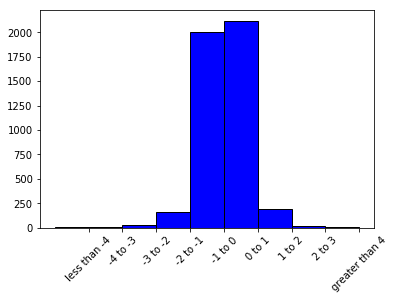

In [181]:
all_sum = freq.sum()
freq['probability'] = 100 * freq['frequencies'] / all_sum['frequencies']
freq['cumulative_probability'] = freq['probability'].cumsum()